In [1]:
import nibabel as nib
import numpy as np
import os

subs = ["sub-01", "sub-02", "sub-05", "sub-07"]

base_dir = "/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni"

for sub in subs:
    mask_path = os.path.join(base_dir, sub, f"{sub}_nsdgeneral_in_MNI.nii.gz")
    
    if not os.path.exists(mask_path):
        print(f"[WARN] File not found: {mask_path}")
        continue

    mask_img = nib.load(mask_path)
    mask = mask_img.get_fdata(dtype=np.float32)

    # 값이 1인 복셀 개수
    num_voxels = np.sum(mask == 1)

    print(f"{sub}: {num_voxels} voxels")


sub-01: 117035 voxels
sub-02: 112578 voxels
sub-05: 122284 voxels
sub-07: 117035 voxels


In [1]:
import os
import nibabel as nib
import numpy as np

subs = ["sub-01", "sub-02", "sub-05", "sub-07"]
base_dir = "/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni"
masks = []

for sub in subs:
    mask_path = os.path.join(base_dir, sub, f"{sub}_nsdgeneral_in_MNI.nii.gz")
    print("Loading:", mask_path)

    img = nib.load(mask_path)
    mask = img.get_fdata(dtype=np.float32)
    bin_mask = (mask > 0.5).astype(np.uint8)
    masks.append(bin_mask)

masks = np.stack(masks, axis=-1)
group_mask = (np.sum(masks, axis=-1) >= 3).astype(np.uint8)

print("Group mask voxels:", int(group_mask.sum()))

ref_img = nib.load(os.path.join(base_dir, subs[0], f"{subs[0]}_nsdgeneral_in_MNI.nii.gz"))
out_img = nib.Nifti1Image(group_mask, affine=ref_img.affine, header=ref_img.header)
out_path = os.path.join(base_dir, "group_nsdgeneral_in_MNI.nii.gz")
nib.save(out_img, out_path)
print("Saved:", out_path)


Loading: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni/sub-01/sub-01_nsdgeneral_in_MNI.nii.gz
Loading: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni/sub-02/sub-02_nsdgeneral_in_MNI.nii.gz
Loading: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni/sub-05/sub-05_nsdgeneral_in_MNI.nii.gz
Loading: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni/sub-07/sub-07_nsdgeneral_in_MNI.nii.gz
Group mask voxels: 101319
Saved: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni/group_nsdgeneral_in_MNI.nii.gz


In [ ]:
#.npy 파일 shape 확인

import numpy as np

file_path = '/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni_2mm/sub-01/sub-01_beta_test_wb_z.npy'
data = np.load(file_path)
print(f"배열의 shape: {data.shape}")
print(data)


배열의 shape: (101319, 750)
[[  -88.27266   -235.29953   -144.07748  ...   109.29901    318.14774
    276.1264  ]
 [  255.69789    149.69803    601.1741   ...   354.01227    565.57434
    721.3465  ]
 [ 1186.9498    1012.58826   1131.8556   ... -1061.8302    1292.5708
   -505.43182 ]
 ...
 [ -863.7809      33.253506  -146.296    ...   544.66095    622.7244
    769.5745  ]
 [-2384.2932     594.9237      77.79341  ...   653.0877    2962.9065
   1569.2561  ]
 [-3789.1519    1526.2278     -42.284092 ...   622.6341    3828.1047
   2038.0052  ]]


Voxel index: 10000
Shape: (27000,)
Min: -1669.943
Max: 2637.288
Mean: 649.32635
Std: 438.03476
Median: 658.92566


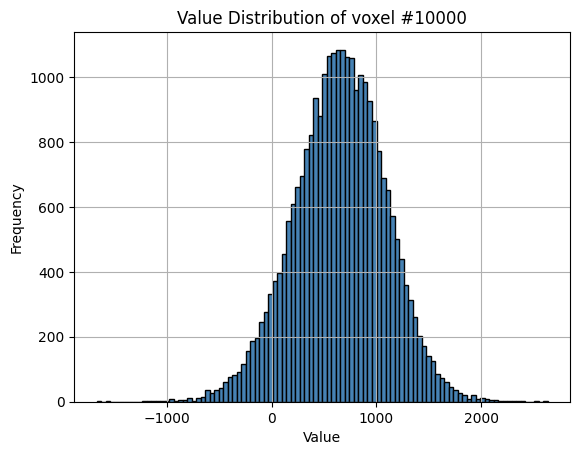

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# z-score된 train 데이터 로드 (shape: 27000 x 101319)
beta_train_z = np.load('/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/test/sub-01_beta-train_nsdgeneral.npy')

# ----------------------------
# 1) 볼 voxel index 설정
# ----------------------------
voxel_idx = 10000   # 원하는 column 번호 지정

# 해당 voxel의 27000개 값 추출
voxel_values = beta_train_z[:, voxel_idx]  # shape: (27000,)
# ----------------------------

print("Voxel index:", voxel_idx)
print("Shape:", voxel_values.shape)
print("Min:", np.min(voxel_values))
print("Max:", np.max(voxel_values))
print("Mean:", np.mean(voxel_values))
print("Std:", np.std(voxel_values))
print("Median:", np.median(voxel_values))

plt.hist(voxel_values, bins=100, color='steelblue', edgecolor='black')
plt.title(f"Value Distribution of voxel #{voxel_idx}")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Voxel index: 10000
Shape: (27000,)
Min: -1863.39
Max: 3000.9424
Mean: 175.3086
Std: 435.538
Median: 166.36691


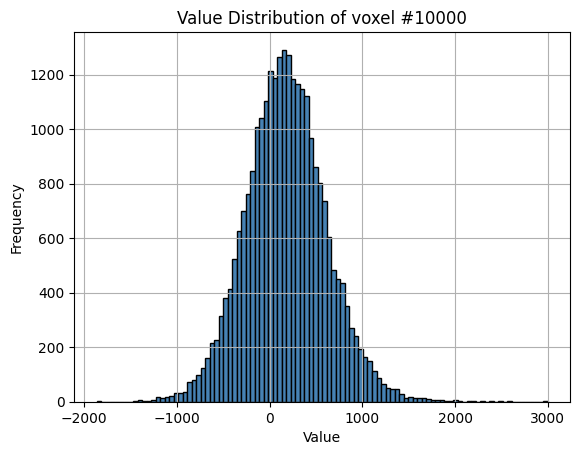

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# z-score된 train 데이터 로드 (shape: 27000 x 101319)
beta_train_z = np.load('/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni/sub-01/sub-01_beta_train.npy')

# ----------------------------
# 1) 볼 voxel index 설정
# ----------------------------
voxel_idx = 10000   # 원하는 column 번호 지정

# 해당 voxel의 27000개 값 추출
voxel_values = beta_train_z[:, voxel_idx]  # shape: (27000,)
# ----------------------------

print("Voxel index:", voxel_idx)
print("Shape:", voxel_values.shape)
print("Min:", np.min(voxel_values))
print("Max:", np.max(voxel_values))
print("Mean:", np.mean(voxel_values))
print("Std:", np.std(voxel_values))
print("Median:", np.median(voxel_values))

plt.hist(voxel_values, bins=100, color='steelblue', edgecolor='black')
plt.title(f"Value Distribution of voxel #{voxel_idx}")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


X1 (1mm):   (27000, 101319) float32
X2 (2mm):   (27000, 17355) float32
X3 (1.8mm): (27000, 15724) float64

[mni_1mm (sampled)] n=1000000
 mean: 407.4275207519531  std: 607.3341674804688
 min : -9333.8193359375  max: 14434.775390625
 quantiles [0.1%,1%,10%,50%,90%,99%,99.9%]:
  [-1394.8790249   -632.70251099  -145.34859467   296.27960205
  1078.74289551  2590.65774902  4615.69842773]

[mni_2mm (sampled)] n=1000000
 mean: 368.39569091796875  std: 732.7645263671875
 min : -21182.15234375  max: 23778.78515625
 quantiles [0.1%,1%,10%,50%,90%,99%,99.9%]:
  [-3366.23258032 -1126.73393677  -209.29726715   249.36769104
  1100.72487793  2927.78034668  5680.2389248 ]

[sub1_1.8mm (sampled)] n=1000000
 mean: 382.5578308105469  std: 784.455322265625
 min : -15899.0  max: 32767.0
 quantiles [0.1%,1%,10%,50%,90%,99%,99.9%]:
  [-2659.002 -1060.     -307.      261.     1193.     3131.     6157.001]

=== Approx KS statistic (pairwise) ===
KS(1mm, 2mm):    0.05259200000000003
KS(1mm, 1.8mm):  0.082699
KS

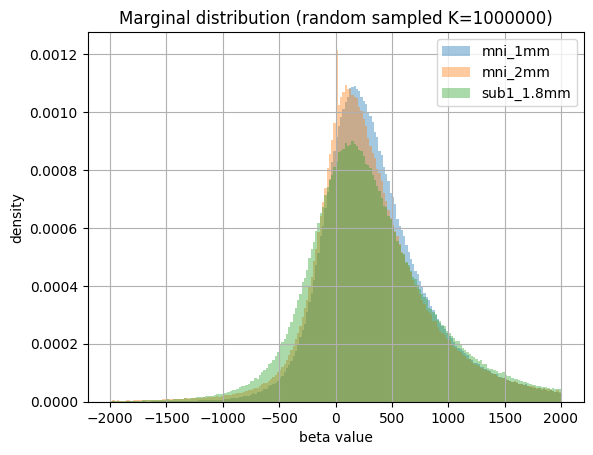

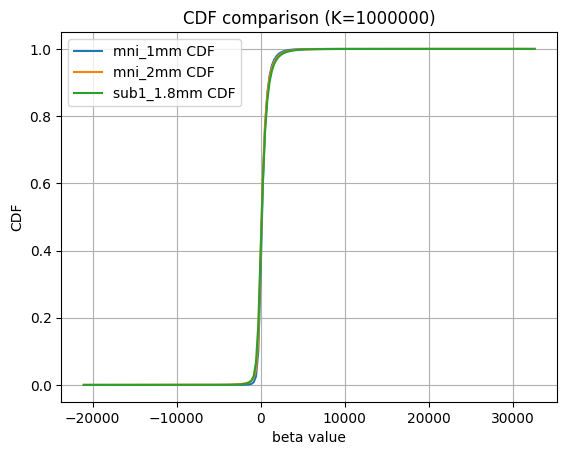

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# paths
# ----------------------------
p1 = "/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni/sub-01/sub-01_beta_train.npy"
p2 = "/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/test/sub-01_beta-train_nsdgeneral.npy"
p3 = "/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_nsd/sub-01/sub-01_betas_tr.npy"

# ----------------------------
# load as memmap
# ----------------------------
X1 = np.load(p1, mmap_mode="r")  # (T, V1)
X2 = np.load(p2, mmap_mode="r")  # (T, V2)
X3 = np.load(p3, mmap_mode="r")  # (T, V3)

print("X1 (1mm):  ", X1.shape, X1.dtype)
print("X2 (2mm):  ", X2.shape, X2.dtype)
print("X3 (1.8mm):", X3.shape, X3.dtype)

# ----------------------------
# random sampling from (row, col) pairs
# ----------------------------
def sample_marginal(mm, K=1_000_000, seed=0, chunk=200_000):
    rng = np.random.default_rng(seed)
    T, V = mm.shape
    out = np.empty(K, dtype=np.float32)
    filled = 0
    while filled < K:
        k = min(chunk, K - filled)
        rows = rng.integers(0, T, size=k, dtype=np.int64)
        cols = rng.integers(0, V, size=k, dtype=np.int64)
        out[filled:filled+k] = mm[rows, cols].astype(np.float32, copy=False)
        filled += k
    return out

K = 1_000_000
s1 = sample_marginal(X1, K=K, seed=0)
s2 = sample_marginal(X2, K=K, seed=1)
s3 = sample_marginal(X3, K=K, seed=2)

# ----------------------------
# summary stats
# ----------------------------
def summary(a, name):
    qs = np.quantile(a, [0.001, 0.01, 0.1, 0.5, 0.9, 0.99, 0.999])
    print(f"\n[{name}] n={a.size}")
    print(" mean:", float(a.mean()), " std:", float(a.std()))
    print(" min :", float(a.min()), " max:", float(a.max()))
    print(" quantiles [0.1%,1%,10%,50%,90%,99%,99.9%]:")
    print(" ", qs)

summary(s1, "mni_1mm (sampled)")
summary(s2, "mni_2mm (sampled)")
summary(s3, "sub1_1.8mm (sampled)")

# ----------------------------
# approx KS statistic (no scipy)
# ----------------------------
def ks_stat(a, b):
    a = np.sort(a)
    b = np.sort(b)
    z = np.sort(np.concatenate([a, b]))
    fa = np.searchsorted(a, z, side="right") / a.size
    fb = np.searchsorted(b, z, side="right") / b.size
    return float(np.max(np.abs(fa - fb)))

ks12 = ks_stat(s1, s2)
ks13 = ks_stat(s1, s3)
ks23 = ks_stat(s2, s3)

print("\n=== Approx KS statistic (pairwise) ===")
print("KS(1mm, 2mm):   ", ks12)
print("KS(1mm, 1.8mm): ", ks13)
print("KS(2mm, 1.8mm): ", ks23)

# ----------------------------
# plot: overlay histogram
# ----------------------------
bins = 200
lo = float(min(s1.min(), s2.min(), s3.min()))
hi = float(max(s1.max(), s2.max(), s3.max()))

plt.figure()
plt.hist(s1, bins=bins, range=(-2000, 2000), density=True, alpha=0.4, label="mni_1mm")
plt.hist(s2, bins=bins, range=(-2000, 2000), density=True, alpha=0.4, label="mni_2mm")
#plt.hist(s3, bins=bins, range=(-2000, 2000), density=True, alpha=0.4, label="sub1_1.8mm")
plt.title(f"Marginal distribution (random sampled K={K})")
plt.xlabel("beta value")
plt.ylabel("density")
plt.grid(True)
plt.legend()
plt.show()

# ----------------------------
# plot: CDF comparison (from hist)
# ----------------------------
def cdf_from_samples(s, bins, lo, hi):
    h, edges = np.histogram(s, bins=bins, range=(lo, hi), density=True)
    dx = np.diff(edges)
    cdf = np.cumsum(h * dx)
    centers = (edges[:-1] + edges[1:]) / 2
    return centers, cdf

centers, cdf1 = cdf_from_samples(s1, bins, lo, hi)
_,       cdf2 = cdf_from_samples(s2, bins, lo, hi)
_,       cdf3 = cdf_from_samples(s3, bins, lo, hi)

plt.figure()
plt.plot(centers, cdf1, label="mni_1mm CDF")
plt.plot(centers, cdf2, label="mni_2mm CDF")
plt.plot(centers, cdf3, label="sub1_1.8mm CDF")
plt.title(f"CDF comparison (K={K})")
plt.xlabel("beta value")
plt.ylabel("CDF")
plt.grid(True)
plt.legend()
plt.show()


In [12]:
import numpy as np

# ==== 경로만 네 파일로 바꿔줘 ====
train_path = "/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/test/sub-01_beta-train_nsdgeneral.npy"      # z-score 전
train_z_path = "/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/test/sub-01_beta-train_nsdgeneral_z.npy"  # z-score 후

def check_near_zero_std(path, thr=1e-6, max_print=10):
    x = np.load(path)  # 기대 shape: (n_trials, n_vox)
    if x.ndim != 2:
        raise ValueError(f"Expected 2D (n_trials, n_vox), got {x.shape} from {path}")

    std = x.std(axis=0)  # voxel-wise std (각 voxel=column)
    frac = (std < thr).mean()

    print(f"\n[FILE] {path}")
    print(" shape:", x.shape, "dtype:", x.dtype)
    print(f" near-zero std voxels (<{thr}): {frac:.6f}  ({(std < thr).sum()} / {std.size})")
    print(" std min/median/mean/max:",
          float(std.min()), float(np.median(std)), float(std.mean()), float(std.max()))

    # 예시로 몇 개 인덱스 출력
    idx = np.where(std < thr)[0]
    if idx.size > 0:
        print(f" first {min(max_print, idx.size)} near-zero voxel indices:", idx[:max_print].tolist())
    else:
        print(" no near-zero voxels found.")

# z-score 전/후 둘 다 확인
check_near_zero_std(train_path, thr=1e-6)
check_near_zero_std(train_z_path, thr=1e-6)



[FILE] /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/test/sub-01_beta-train_nsdgeneral.npy
 shape: (27000, 17355) dtype: float32
 near-zero std voxels (<1e-06): 0.004033  (70 / 17355)
 std min/median/mean/max: 0.0 286.77825927734375 406.5290222167969 4424.42919921875
 first 10 near-zero voxel indices: [203, 204, 205, 371, 372, 617, 618, 1643, 2069, 2387]

[FILE] /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/test/sub-01_beta-train_nsdgeneral_z.npy
 shape: (27000, 17355) dtype: float32
 near-zero std voxels (<1e-06): 0.004033  (70 / 17355)
 std min/median/mean/max: 0.0 1.0 0.9959665536880493 1.0000077486038208
 first 10 near-zero voxel indices: [203, 204, 205, 371, 372, 617, 618, 1643, 2069, 2387]


In [1]:
import numpy as np

npz_path = "/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_mni/sub-05/sub-05_test_nsdgeneral.npz"
data = np.load(npz_path, allow_pickle=True)

print("Keys in NPZ:", data.files)

for key in data.files:
    print("\n==== Key:", key, "====")
    arr = data[key]

    if arr.ndim == 1:
        # filename 리스트 같은 경우
        print(arr[:10])   # 앞 10개만 출력
    else:
        # beta matrix 같은 경우
        print(arr[:2, :5])  # 앞 2행 5열만 출력


Keys in NPZ: ['beta', 'stimuli']

==== Key: beta ====
[[ 1.7941313   2.693886    0.48135534 -0.71442086 -0.80190617]
 [-0.6120736  -0.43488783 -0.8121292  -0.38580075 -0.09764101]]

==== Key: stimuli ====
['coco2017_46003.jpg' 'coco2017_48618.jpg' 'coco2017_44981.jpg'
 'coco2017_32626.jpg' 'coco2017_53053.jpg' 'coco2017_4931.jpg'
 'coco2017_32626.jpg' 'coco2017_6432.jpg' 'coco2017_70336.jpg'
 'coco2017_36577.jpg']


In [7]:
import nibabel as nib
import numpy as np
import os

base_dir = "/nas/research/03-Neural_decoding/3-bids/2-derivatives"

schaefer_path = os.path.join(base_dir,"Schaefer2018_200Parcels_7Networks_order_FSLMNI152_1mm.nii.gz")
group_mask_path = os.path.join(base_dir,"1-beta/beta_mni/group_nsdgeneral_in_MNI.nii.gz")


schaefer_img = nib.load(schaefer_path)
schaefer_data = schaefer_img.get_fdata()  # (182, 218, 182)
mask_img = nib.load(group_mask_path)
mask_data = mask_img.get_fdata()          # (182, 218, 182)

print("Schaefer shape:", schaefer_data.shape)
print("Mask shape    :", mask_data.shape)

mask_bool = (mask_data > 0.5)
n_vox_in_mask = int(mask_bool.sum())
print(f"Mask == 1 인 voxel 개수: {n_vox_in_mask}")

if schaefer_data.shape != mask_data.shape:
    raise ValueError("Schaefer와 group mask의 shape이 다릅니다!")

schaefer_flat = schaefer_data[mask_bool]
print("마스크 적용 후 Schaefer label 배열 shape:", schaefer_flat.shape)

labels, counts = np.unique(schaefer_flat, return_counts=True)

nonzero_mask = labels != 0
labels = labels[nonzero_mask]
counts = counts[nonzero_mask]

sort_idx = np.argsort(labels)
labels = labels[sort_idx]
counts = counts[sort_idx]

for lbl, cnt in zip(labels, counts):
    print(f"Label {int(lbl):3d}: {cnt:6d} voxels")

print("\n라벨별 voxel 합:", int(counts.sum()))
print("group mask voxel 수:", n_vox_in_mask)


Schaefer shape: (182, 218, 182)
Mask shape    : (182, 218, 182)
Mask == 1 인 voxel 개수: 101319
마스크 적용 후 Schaefer label 배열 shape: (101319,)
Label   1:   2456 voxels
Label   2:   5498 voxels
Label   3:   3674 voxels
Label   4:    942 voxels
Label   5:   2360 voxels
Label   7:   3270 voxels
Label   8:   3999 voxels
Label   9:   3722 voxels
Label  10:    711 voxels
Label  11:   4365 voxels
Label  12:     29 voxels
Label  13:   1873 voxels
Label  14:   3820 voxels
Label  31:   4277 voxels
Label  32:   1871 voxels
Label  33:   2146 voxels
Label  36:      7 voxels
Label  37:     41 voxels
Label  38:     35 voxels
Label  58:      7 voxels
Label  62:    284 voxels
Label  78:      1 voxels
Label  79:    827 voxels
Label  80:   1832 voxels
Label  82:    129 voxels
Label 100:   1159 voxels
Label 101:   1391 voxels
Label 102:   1381 voxels
Label 103:   7531 voxels
Label 104:   1418 voxels
Label 105:   1842 voxels
Label 106:   5908 voxels
Label 107:    192 voxels
Label 108:   5110 voxels
Label 109:   

In [ ]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt

path = "/mnt/sdb1/yw/mni_2mm/sub-01/sub-01_beta-train_nsdgeneral.npy"

arr = np.load(path, mmap_mode="r")
flat = arr.reshape(-1)

print(f"Loaded: {path}")
print(f"Shape: {arr.shape}, dtype: {arr.dtype}, count: {flat.size:,}")
print(f"Min/Max: {flat.min():.6g} / {flat.max():.6g}")
print(f"Mean/Std: {flat.mean():.6g} / {flat.std():.6g}")
print(f"Median: {np.median(flat):.6g}")
for p in [0.1, 1, 5, 25, 50, 75, 95, 99, 99.9]:
    print(f"p{p:>4}: {np.percentile(flat, p):.6g}")

# 4) 히스토그램 (너무 크면 샘플링해서 그리기)
sample_size = 2_000_000  # None이면 전체 사용 (근데 매우 느릴 수 있음)
if (sample_size is not None) and (flat.size > sample_size):
    rng = np.random.default_rng(0)
    idx = rng.choice(flat.size, size=sample_size, replace=False)
    x = np.asarray(flat[idx])
    print(f"[INFO] histogram은 샘플 {sample_size:,}개로 그림")
else:
    x = np.asarray(flat)
    print("[INFO] histogram은 전체 값으로 그림")

# 5) 일반 히스토그램
plt.figure(figsize=(8, 5))
plt.hist(x, bins=200)
plt.title("Value distribution (histogram)")
plt.xlabel("Value")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 6) 로그 y 스케일 (꼬리/제로 많을 때 보기 좋음)
plt.figure(figsize=(8, 5))
plt.hist(x, bins=200)
plt.yscale("log")
plt.title("Value distribution (histogram, log y-scale)")
plt.xlabel("Value")
plt.ylabel("Count (log)")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from pathlib import Path

tsv_path = Path("/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/beta_huggingface/sub-01/sub-01_mapped_nsd_test.tsv")

out_dir = Path("/nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/connectomind1_v2/sub-01")
out_dir.mkdir(parents=True, exist_ok=True)
out_npy = out_dir / "sub-01_stimuli-test.npy"

# TSV 1열만 읽기 (빈 줄 제거)
lines = []
with tsv_path.open("r", encoding="utf-8") as f:
    for ln in f:
        ln = ln.strip()
        if not ln:
            continue
        lines.append(ln.split("\t")[0])

# object dtype로 만들고 저장 (pickle 사용)
arr = np.array(lines, dtype=object)
np.save(out_npy, arr, allow_pickle=True)

print(f"[OK] saved: {out_npy} shape={arr.shape} dtype={arr.dtype} allow_pickle=True")


[OK] saved: /nas/research/03-Neural_decoding/3-bids/2-derivatives/1-beta/connectomind1_v2/sub-01/sub-01_stimuli-train.npy shape=(27000,) dtype=object allow_pickle=True
